## Lecture Notes on K Means Clustering from JosePortilla_UDEMY - Henric Jandoc

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use(['science', 'notebook', 'grid', 'no-latex'])

In [3]:
df = pd.read_csv('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\bank-full.csv')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


<AxesSubplot:xlabel='age', ylabel='Count'>

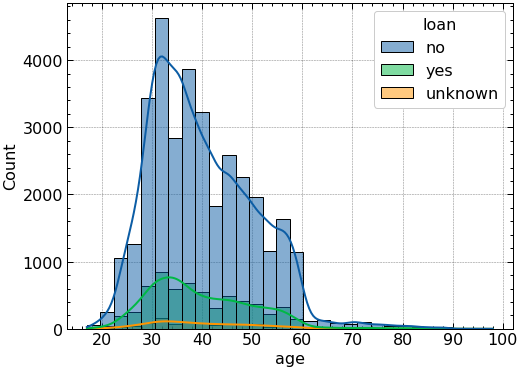

In [7]:
sns.histplot(data = df, x = 'age', bins = 30, kde = True, hue = 'loan')

<AxesSubplot:xlabel='contact', ylabel='count'>

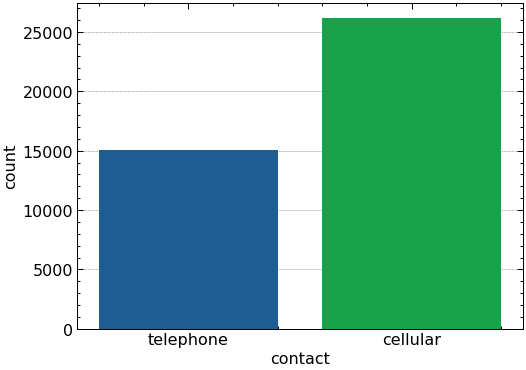

In [8]:
sns.countplot(data = df, x ='contact')

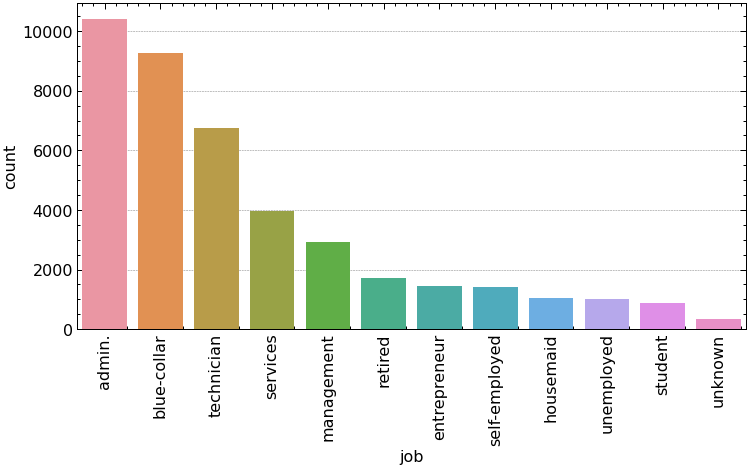

In [9]:
plt.figure(figsize = (12,6))
sns.countplot(data = df, x = 'job', order = df['job'].value_counts().index)
plt.xticks(rotation = 90);

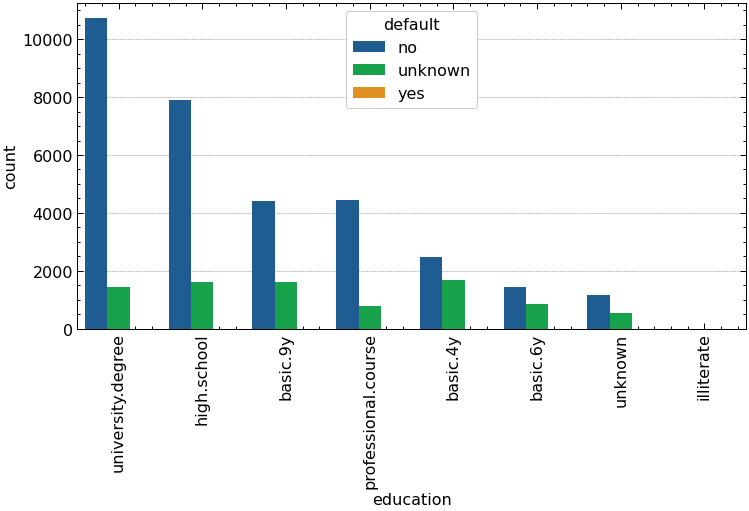

In [10]:
plt.figure(figsize = (12,6))
sns.countplot(data = df, x = 'education', order = df['education'].value_counts().index, hue = 'default')
plt.xticks(rotation = 90);

In [11]:
# sns.pairplot(df)

In [12]:
X = pd.get_dummies(df)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaled_X = scaler.fit_transform(X)

In [16]:
from sklearn.cluster import KMeans 

In [17]:
# help(KMeans)

In [18]:
model = KMeans(n_clusters = 2)

In [19]:
cluster_labels = model.fit_predict(scaled_X)

In [20]:
cluster_labels

array([0, 0, 0, ..., 1, 1, 1])

In [21]:
X['Cluster'] = cluster_labels

In [22]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,1
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,1
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,1


In [23]:
X.corr().transpose()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,...,0.019027,-0.021356,0.019137,-0.023671,-0.002537,-0.016376,0.035626,-0.030399,0.030399,-0.019699
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,...,-0.023068,0.014666,0.004140,0.014537,-0.013311,-0.011665,0.044876,-0.405274,0.405274,0.039894
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,...,0.014405,0.005141,-0.025125,-0.021088,-0.068890,0.087645,-0.050893,0.066357,-0.066357,-0.129129
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,...,0.001031,-0.008186,-0.007300,0.001021,0.006354,0.491353,-0.950700,0.324914,-0.324914,-0.267700
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,...,-0.002012,0.001512,0.000090,-0.003929,0.682608,-0.878776,0.524045,-0.230181,0.230181,0.478467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
poutcome_nonexistent,-0.016376,-0.011665,0.087645,0.491353,-0.878776,0.472501,0.304264,0.099724,0.488406,0.493051,...,0.002226,-0.000585,0.001574,0.006545,-0.853119,1.000000,-0.466928,0.193507,-0.193507,-0.544377
poutcome_success,0.035626,0.044876,-0.050893,-0.950700,0.524045,-0.256886,-0.077416,0.084824,-0.281022,-0.350613,...,-0.002276,0.008827,0.007258,-0.000390,-0.063006,-0.466928,1.000000,-0.316269,0.316269,0.254393
subscribed_no,-0.030399,-0.405274,0.066357,0.324914,-0.230181,0.298334,0.136211,-0.054878,0.307771,0.354678,...,0.021265,-0.013888,-0.008046,-0.006302,-0.031799,0.193507,-0.316269,1.000000,-1.000000,-0.294610
subscribed_yes,0.030399,0.405274,-0.066357,-0.324914,0.230181,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,...,-0.021265,0.013888,0.008046,0.006302,0.031799,-0.193507,0.316269,-1.000000,1.000000,0.294610


<AxesSubplot:>

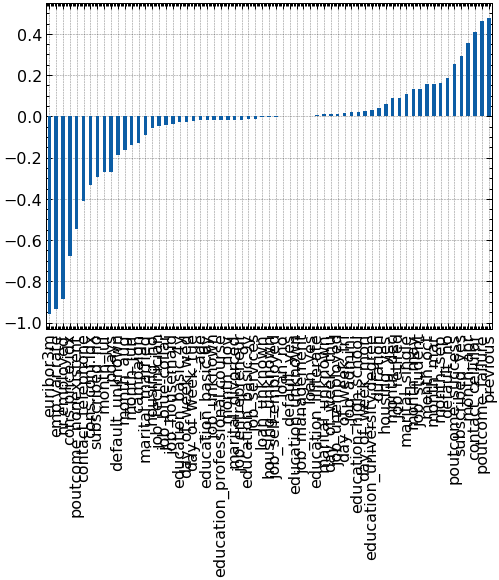

In [24]:
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind = 'bar')

In [25]:
X.corr()['Cluster'].iloc[:-1].sort_values()

euribor3m              -0.959297
emp.var.rate           -0.932612
nr.employed            -0.886155
cons.price.idx         -0.679372
poutcome_nonexistent   -0.544377
                          ...   
subscribed_yes          0.294610
month_apr               0.357923
contact_cellular        0.410476
poutcome_failure        0.464295
previous                0.478467
Name: Cluster, Length: 65, dtype: float64

In [26]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters = k)
    model.fit(scaled_X)
    
    
    ssd.append(model.inertia_)  # ssd point --> cluster center

In [27]:
ssd

[2469792.361662774,
 2370786.483078623,
 2271502.7007717513,
 2221825.1858646288,
 2157695.075795019,
 2105687.7939094948,
 2048661.1823531664,
 1993603.9638813627]

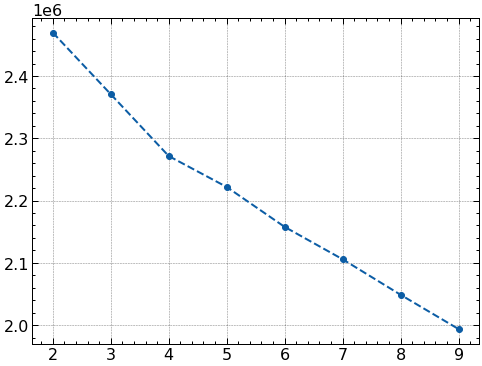

In [28]:
plt.plot(range(2,10), ssd, 'o--')

In [29]:
pd.Series(ssd)

0    2.469792e+06
1    2.370786e+06
2    2.271503e+06
3    2.221825e+06
4    2.157695e+06
5    2.105688e+06
6    2.048661e+06
7    1.993604e+06
dtype: float64

In [30]:
pd.Series(ssd).diff()

0             NaN
1   -99005.878584
2   -99283.782307
3   -49677.514907
4   -64130.110070
5   -52007.281886
6   -57026.611556
7   -55057.218472
dtype: float64

## K-Means Color Quantization 

In [31]:
import matplotlib.image as mpimg

# .jpg .png ----. numpy array

In [32]:
image_as_array = mpimg.imread('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\palm_trees.jpg')

In [34]:
image_as_array.shape  # (H,W,C)

(1401, 934, 3)

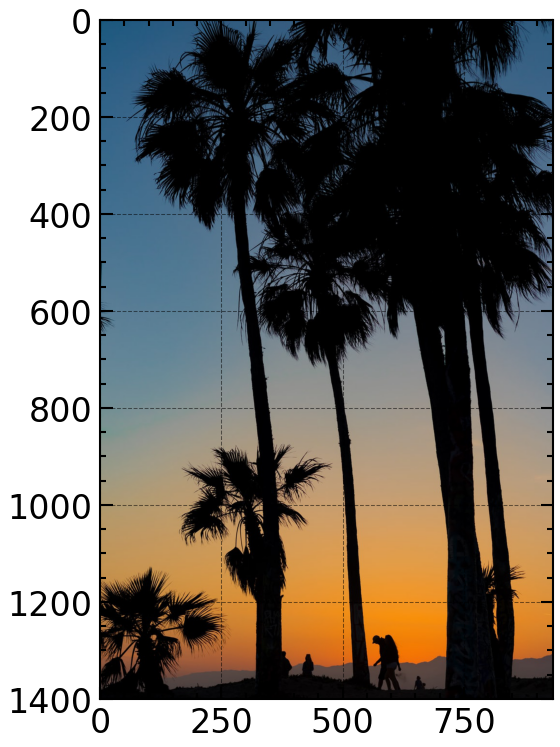

In [36]:
plt.figure(dpi = 150)
plt.imshow(image_as_array)

In [37]:
# (H,W,C) --> 2D (H*W,C)

In [38]:
(h,w,c) = image_as_array.shape

In [39]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [41]:
image_as_array2d.shape

(1308534, 3)

In [42]:
from sklearn.cluster import KMeans

In [43]:
model = KMeans(n_clusters = 6)

In [44]:
labels = model.fit_predict(image_as_array2d)

In [45]:
labels

array([4, 4, 4, ..., 0, 0, 0])

In [47]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [48]:
rgb_codes

array([[  3,   3,   4],
       [137, 144, 144],
       [192, 155, 109],
       [ 68,  62,  62],
       [ 71, 109, 138],
       [219, 135,  46]])

In [49]:
rgb_codes[labels]

array([[ 71, 109, 138],
       [ 71, 109, 138],
       [ 71, 109, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [51]:
quantized_image = np.reshape(rgb_codes[labels], (h,w,c))

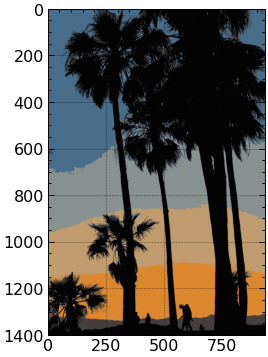

In [52]:
plt.imshow(quantized_image)

## Lecture Notes on Hierarchical Clusting

In [53]:
df = pd.read_csv('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\cluster_mpg.csv')

In [54]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 27.7+ KB


In [57]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


In [58]:
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [59]:
df_w_dummies = pd.get_dummies(df.drop('name', axis = 1))

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
# MinMaxScaler

scaler = MinMaxScaler()

In [62]:
scaled_data = scaler.fit_transform(df_w_dummies)

In [63]:
scaled_df = pd.DataFrame(scaled_data, columns = df_w_dummies.columns)

In [64]:
scaled_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0


<AxesSubplot:>

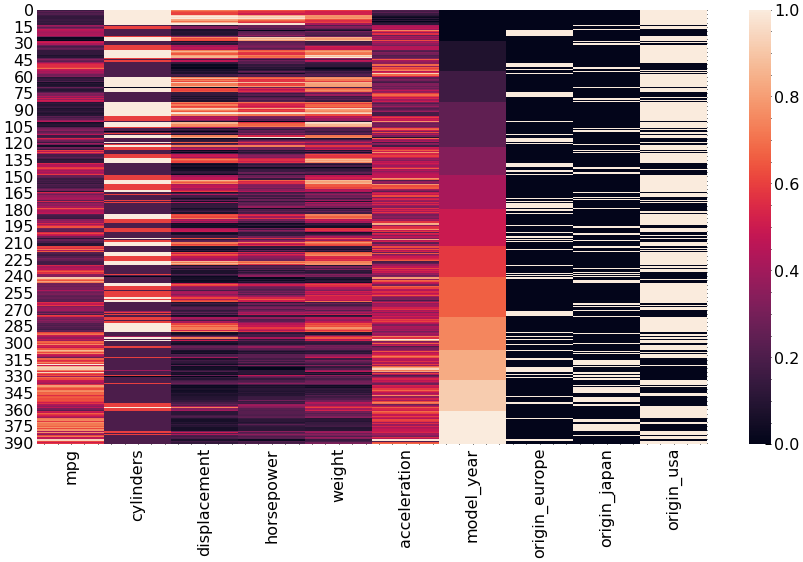

In [65]:
plt.figure(figsize = (15,8))
sns.heatmap(scaled_df)

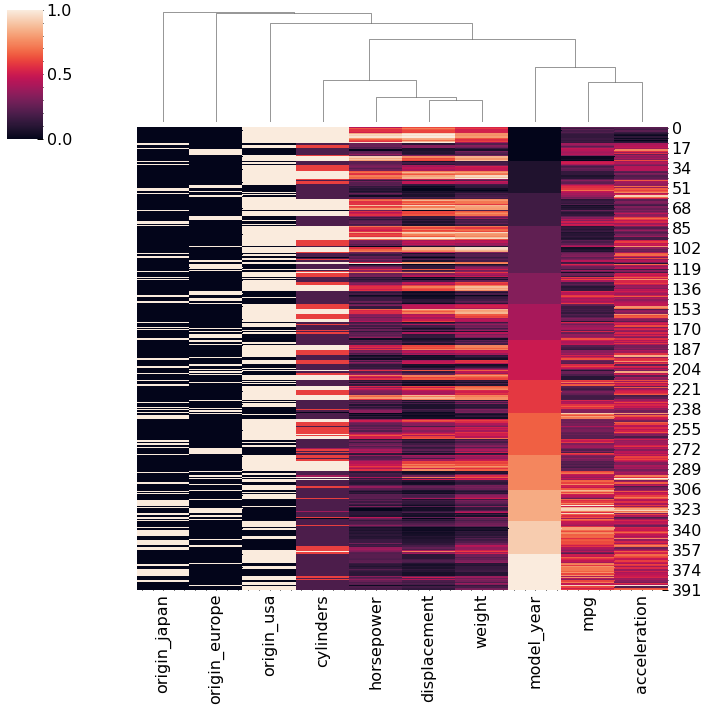

In [67]:
sns.clustermap(scaled_df, row_cluster = False)

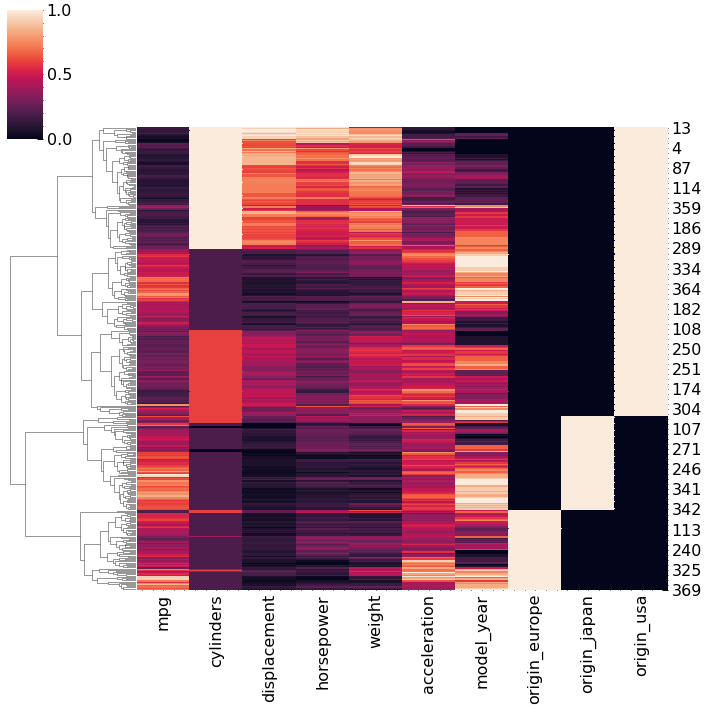

In [69]:
sns.clustermap(scaled_df, col_cluster = False)

In [70]:
from sklearn.cluster import AgglomerativeClustering

In [71]:
model = AgglomerativeClustering(n_clusters = 4)

In [72]:
cluster_labels = model.fit_predict(scaled_df)

In [73]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

<AxesSubplot:xlabel='mpg', ylabel='weight'>

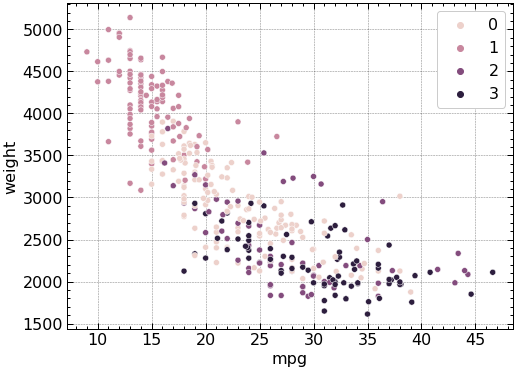

In [76]:
sns.scatterplot(data = df, x = 'mpg', y = 'weight', hue = cluster_labels)

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

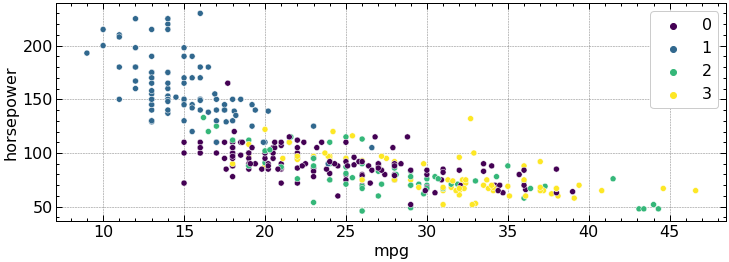

In [79]:
plt.figure(figsize = (12,4))
sns.scatterplot(data = df, x = 'mpg', y = 'horsepower', hue = cluster_labels, palette = 'viridis')

In [80]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

In [81]:
cluster_labels = model.fit_predict(scaled_df)

In [82]:
cluster_labels

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

In [96]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [86]:
linkage_matrix = hierarchy.linkage(model.children_)

In [87]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

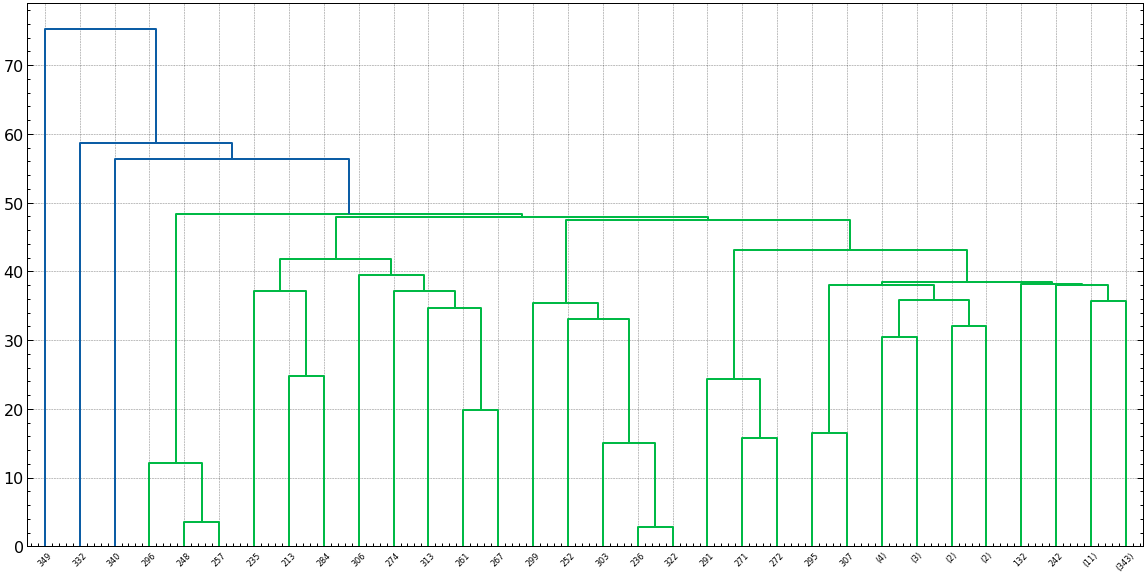

In [97]:
plt.figure(figsize = (20,10))
dendro = dendrogram(linkage_matrix, truncate_mode = 'level', p = 10)

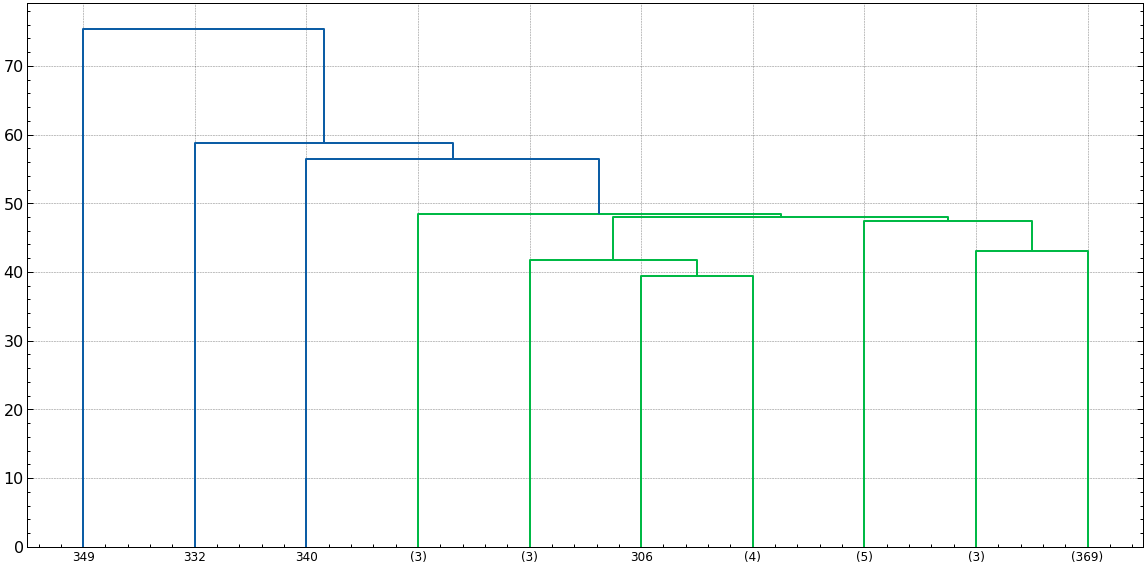

In [98]:
plt.figure(figsize = (20,10))
dendro = dendrogram(linkage_matrix, truncate_mode = 'lastp', p = 10)

## Lecture Notes on DBSCAN

In [99]:
blobs = pd.read_csv('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\cluster_blobs.csv')

In [100]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<AxesSubplot:xlabel='X1', ylabel='X2'>

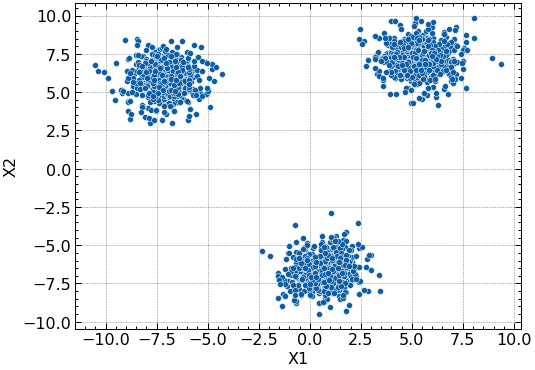

In [101]:
sns.scatterplot(data = blobs, x = 'X1', y = 'X2')

In [102]:
moons = pd.read_csv('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\cluster_moons.csv')

<AxesSubplot:xlabel='X1', ylabel='X2'>

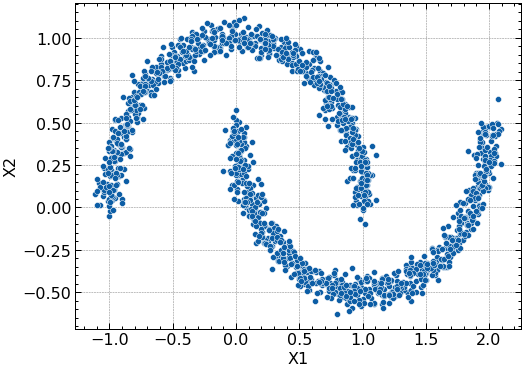

In [103]:
sns.scatterplot(data = moons, x = 'X1', y = 'X2')

In [104]:
circles = pd.read_csv('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\cluster_circles.csv')

<AxesSubplot:xlabel='X1', ylabel='X2'>

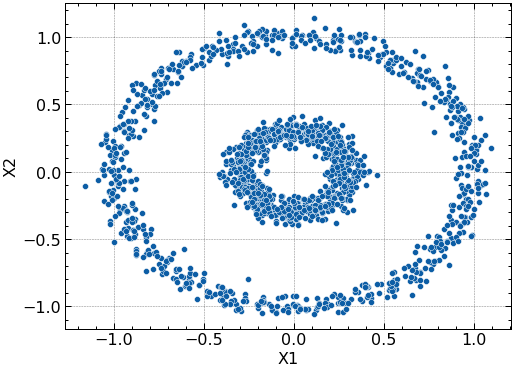

In [105]:
sns.scatterplot(data = circles, x = 'X1', y = 'X2')

In [106]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data = data, x = 'X1', y = 'X2', hue = labels, palette = 'Set1')

In [107]:
from sklearn.cluster import KMeans

In [114]:
model = KMeans(n_clusters = 3)

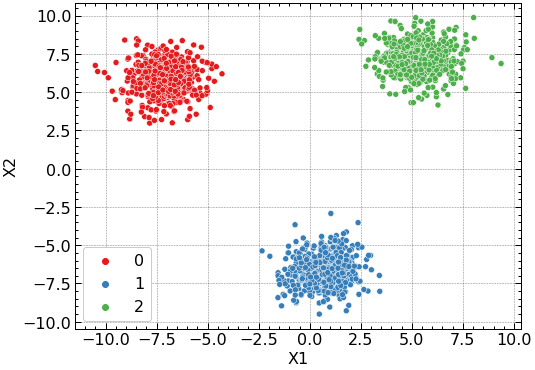

In [115]:
display_categories(model, moons)

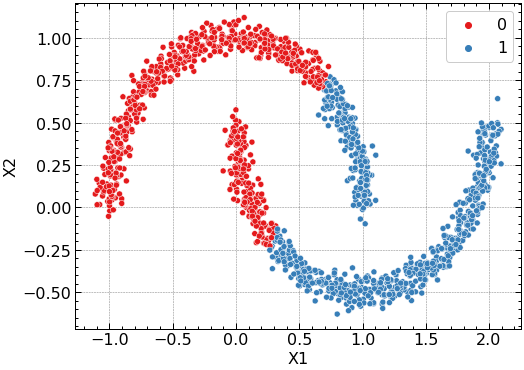

In [116]:
model = KMeans(n_clusters = 2)
display_categories(model, moons)

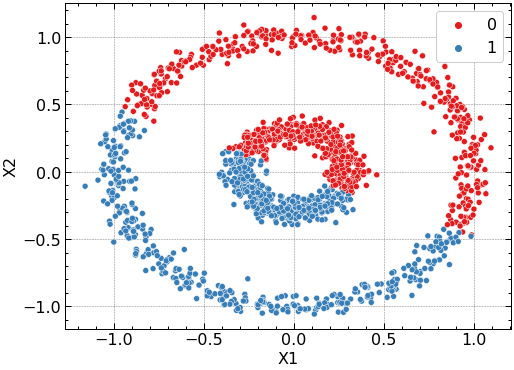

In [117]:
model = KMeans(n_clusters = 2)
display_categories(model, circles)

In [118]:
from sklearn.cluster import DBSCAN

In [119]:
# help(DBSCAN)

In [120]:
model = DBSCAN()

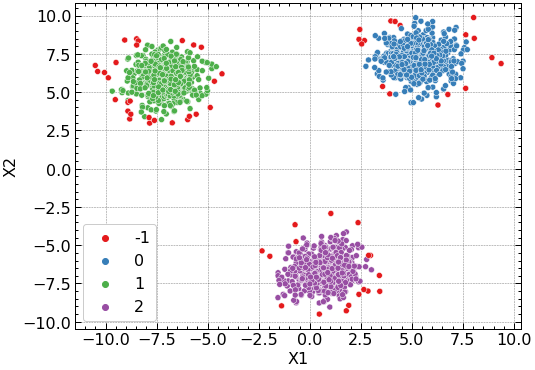

In [121]:
display_categories(model, blobs)

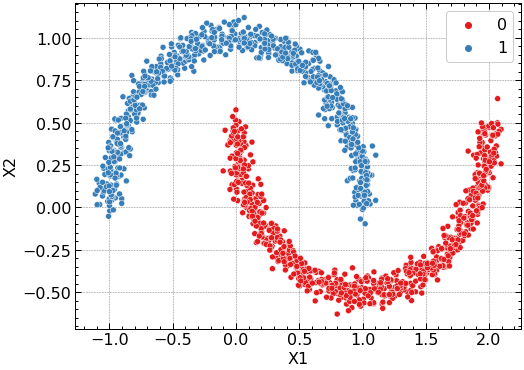

In [125]:
model = DBSCAN(eps = 0.15)
display_categories(model, moons)

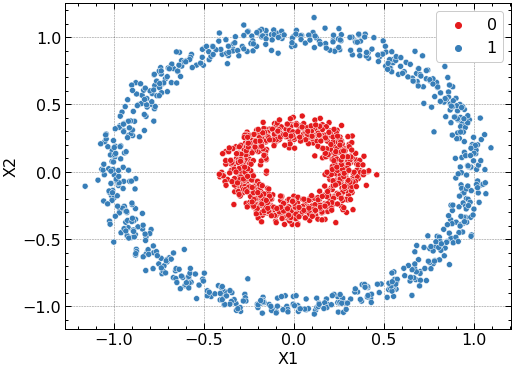

In [126]:
model = DBSCAN(eps = 0.15)
display_categories(model, circles)

In [127]:
two_blobs = pd.read_csv('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\cluster_two_blobs.csv')

In [128]:
two_blobs_outliers = pd.read_csv('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\cluster_two_blobs_outliers.csv')

<AxesSubplot:xlabel='X1', ylabel='X2'>

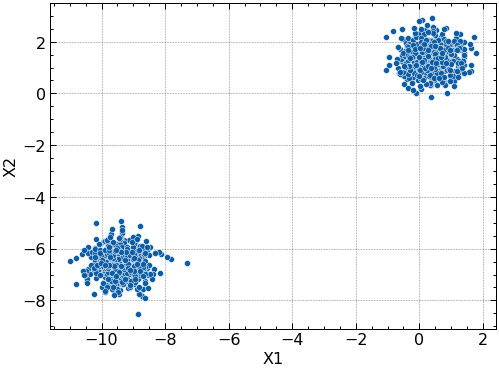

In [129]:
sns.scatterplot(data = two_blobs, x = 'X1', y = 'X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

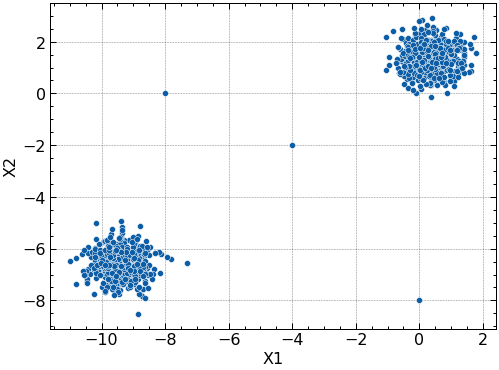

In [130]:
sns.scatterplot(data = two_blobs_outliers, x = 'X1', y = 'X2')

In [131]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data = data, x = 'X1', y = 'X2', hue = labels, palette = 'Set1')

In [132]:
dbscan = DBSCAN()

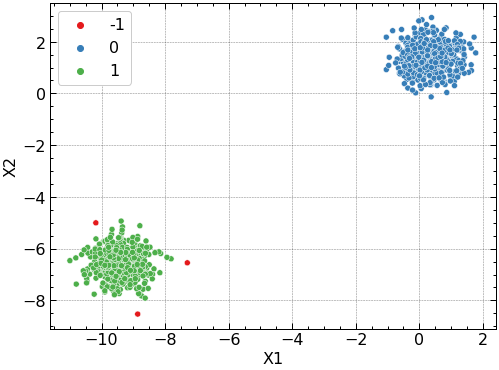

In [133]:
display_categories(dbscan, two_blobs)

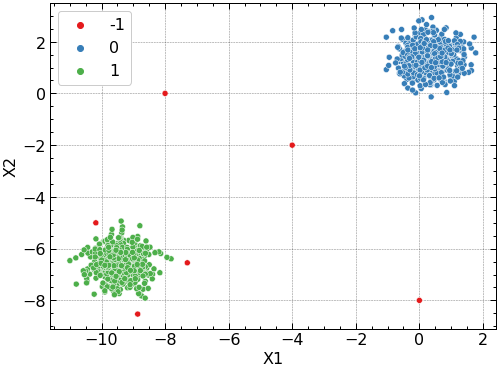

In [134]:
display_categories(dbscan, two_blobs_outliers)

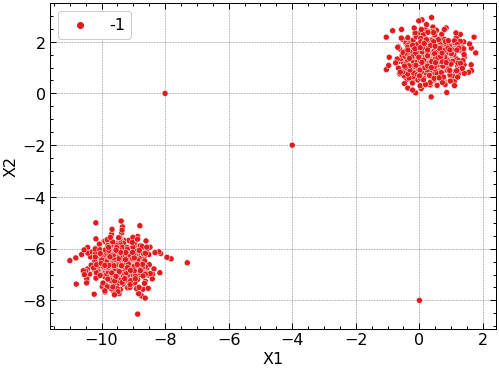

In [135]:
dbscan = DBSCAN(eps = 0.001)
display_categories(dbscan, two_blobs_outliers)

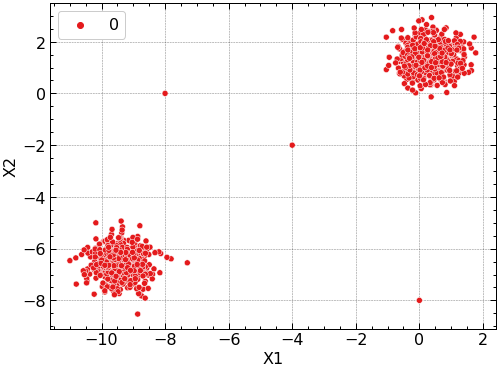

In [136]:
dbscan = DBSCAN(eps = 10)
display_categories(dbscan, two_blobs_outliers)

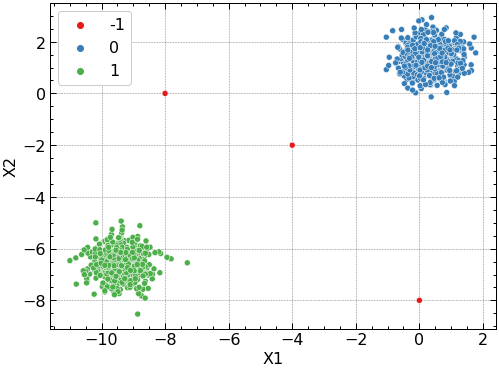

In [137]:
dbscan = DBSCAN(eps = 2)
display_categories(dbscan, two_blobs_outliers)

In [138]:
# total outliers found

np.sum(dbscan.labels_ == -1)

3

In [139]:
# percent of outliers

100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

0.29910269192422734

In [146]:
# elbow method

outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001, 7, 200):
    
    dbscan = DBSCAN(eps = eps)
    dbscan.fit(two_blobs_outliers)
    
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

(0.0, 2.0)

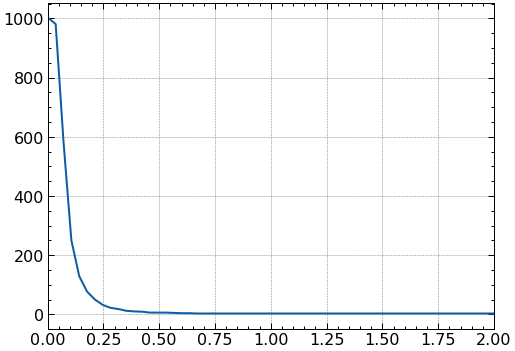

In [147]:
sns.lineplot(x = np.linspace(0.001, 7, 200), y = number_of_outliers)
plt.xlim(0,2)

(0.0, 2.0)

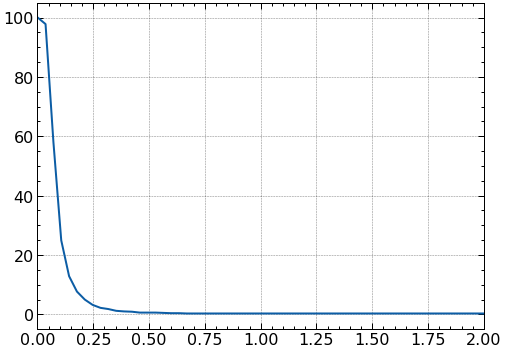

In [148]:
sns.lineplot(x = np.linspace(0.001, 7, 200), y = outlier_percent)
plt.xlim(0,2)

In [151]:
# elbow method

outlier_percent = []
number_of_outliers = []

for n in np.arange(1,100):
    
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

<AxesSubplot:>

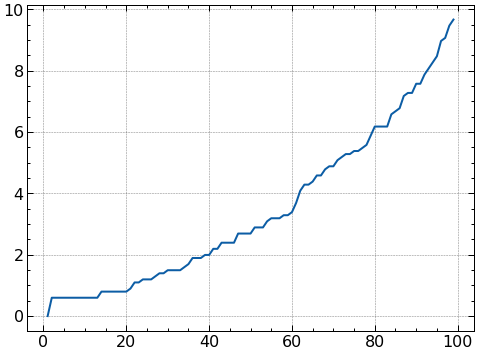

In [152]:
sns.lineplot(x = np.arange(1,100), y = outlier_percent)

<AxesSubplot:>

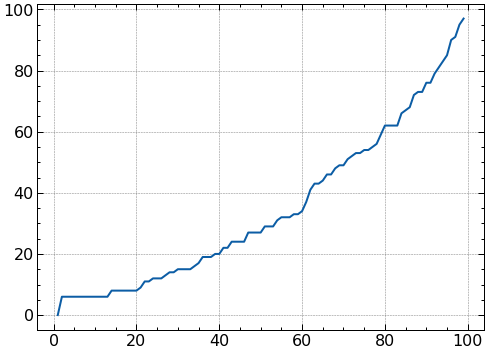

In [153]:
sns.lineplot(x = np.arange(1,100), y = number_of_outliers)